# DSP Signal Processing: Time and Frequency Analysis
Generating a noisy sine wave, applying a low-pass filter, and analyzing in time and frequency domains.
- **Tools:** Python, NumPy, SciPy, Matplotlib
- **Features:** Signal generation, filtering, FFT analysis

In [23]:
# Imports and Setup
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import boto3
%matplotlib inline



In [24]:
# Generate Signal with Noise
t = np.linspace(0, 1, 1000)
freq = 5  # 5 Hz sine wave
noise = 0.5 * np.random.normal(0, 1, t.size)  # Add noise
signal_clean = np.sin(2 * np.pi * freq * t)
signal_noisy = signal_clean + noise



In [25]:
# Apply Low-Pass Filter
fs = 1000  # Sampling frequency (samples per second)
cutoff = 10  # Cutoff frequency (Hz)
order = 4  # Filter order
b, a = signal.butter(order, cutoff / (fs / 2), btype='low')  # Design filter
signal_filtered = signal.filtfilt(b, a, signal_noisy)  # Apply filter



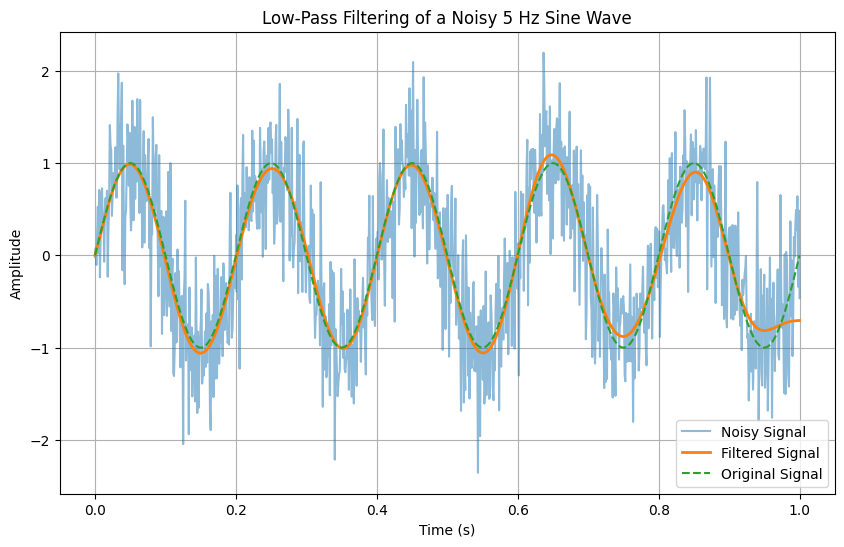

In [26]:
# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(t, signal_noisy, label="Noisy Signal", alpha=0.5)
plt.plot(t, signal_filtered, label="Filtered Signal", linewidth=2)
plt.plot(t, signal_clean, label="Original Signal", linestyle="--")
plt.title("Low-Pass Filtering of a Noisy 5 Hz Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.savefig("filtered_signal.png")
plt.show()



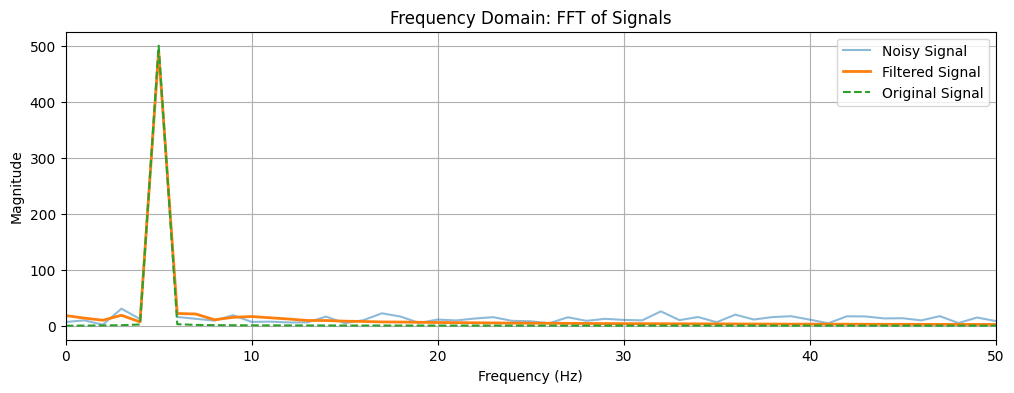

In [28]:
# Frequency Domain (FFT)
n = len(t)
freqs = np.fft.fftfreq(n, 1/fs)  # Frequency bins
fft_noisy = np.fft.fft(signal_noisy)  # FFT of noisy signal
fft_filtered = np.fft.fft(signal_filtered)  # FFT of filtered signal
fft_clean = np.fft.fft(signal_clean)  # FFT of clean signal

# Plot only positive frequencies
mask = freqs >= 0
plt.figure(figsize=(12, 4))
plt.plot(freqs[mask], np.abs(fft_noisy[mask]), label="Noisy Signal", alpha=0.5)
plt.plot(freqs[mask], np.abs(fft_filtered[mask]), label="Filtered Signal", linewidth=2)
plt.plot(freqs[mask], np.abs(fft_clean[mask]), label="Original Signal", linestyle="--")
plt.title("Frequency Domain: FFT of Signals")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)  # Zoom in on lower frequencies
plt.legend()
plt.grid()
plt.show()